<a href="https://colab.research.google.com/github/JacksonHassell/DSP-Project/blob/main/DSP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [272]:
df = pd.read_csv('./Spotify-2000.csv', thousands=',')

#Data Cleaning

In [273]:
print(len(df['Artist'].value_counts()))

731


In [274]:
#Drop Index because we don't need two indices. 
#Drop title because each title is different and it adds no information.
#Drop artist because there are 700 different artists and one-hot-encoding each one will add a bunch of noise to our models
df.drop(['Index', 'Title', 'Artist'], axis=1, inplace=True)

In [275]:
#Drop all songs that belong to a genre with ten or less songs
counts = df['Top Genre'].value_counts()
for index, row in df.iterrows():
  genre = row['Top Genre']
  if counts.loc[genre] < 10:
    df = df.drop(index)
print(df['Top Genre'].value_counts())

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
dutch cabaret         51
classic rock          51
glam rock             49
modern rock           49
pop                   47
art rock              40
permanent wave        38
british invasion      36
irish rock            34
british soul          31
europop               27
classic uk pop        22
disco                 18
dutch rock            18
glam metal            17
neo mellow            17
blues rock            15
alternative dance     15
art pop               14
funk                  13
dutch hip hop         13
dutch americana       12
mellow gold           11
classic soul          11
britpop               11
big beat              11
carnaval limburg      10
Name: Top Genre, dtype: int64


In [276]:
# Standardize numerical values
def standardize_column(column):
  return (column-column.min())/(column.max()-column.min())

df_encoded = df.copy()
columns_to_standardize = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence', 'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity', 'Year']
for col in columns_to_standardize:
  df_encoded[col] = standardize_column(df_encoded[col])

# df_encoded = df_encoded.join(pd.get_dummies(df_encoded['Top Genre']))
# df_encoded = df_encoded.drop('Top Genre', axis=1)
df_encoded.drop('Top Genre', inplace=True, axis=1)

#K Means

Find best k

In [277]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score


# n_clusters = 2
# best_score = 0
# cluster_sizes = []
# scores = []
# for i in range(2, 30, 1):
#   model = KMeans(n_clusters = i, random_state=42).fit(df_encoded)
#   score = silhouette_score(df_encoded, model.labels_, metric='euclidean')
#   if score > best_score:
#     n_clusters = i
#     best_score = score
#   scores.append(score)
#   cluster_sizes.append(i)

# sns.barplot(x=cluster_sizes, y=scores)

In [278]:
model = KMeans(n_clusters = 10, random_state=42).fit(df_encoded)

def std(x): return np.std(x)
def var(x): return np.var(x)

df_display = df_encoded.copy()
df_display['Cluster'] = model.labels_
df_display['Genre'] = df['Top Genre']
df_display['Year'] = df['Year']
# print(df_display.groupby(by='Genre').agg(['mean', 'max', std, var]))

In [279]:
for i in range(0, 10):
  print(df_display[df_display['Cluster'] == i]['Genre'].value_counts())
  for column in columns_to_standardize:
    print(column + " " + str(df_display[df_display['Cluster'] == i][column].mean()))
  print('-----------------------------------------')

alternative metal    37
alternative rock     30
modern rock          24
album rock           19
dutch pop            15
permanent wave       12
alternative dance    12
dance pop            12
glam metal           11
irish rock            7
dutch indie           6
britpop               5
pop                   5
big beat              5
glam rock             4
dance rock            3
art rock              3
dutch cabaret         3
art pop               2
british soul          2
funk                  2
mellow gold           2
classic rock          2
Name: Genre, dtype: int64
Beats Per Minute (BPM) 0.5668267572372434
Energy 0.8202579631085003
Danceability 0.4118174624109734
Loudness (dB) 0.8511210762331839
Liveness 0.1786787480930147
Valence 0.3504764573991031
Length (Duration) 0.13517850525435435
Acousticness 0.031847716665141405
Speechiness 0.06658769777476956
Popularity 0.5993505489407767
Year 2000.9686098654709
-----------------------------------------
album rock           71
dance rock

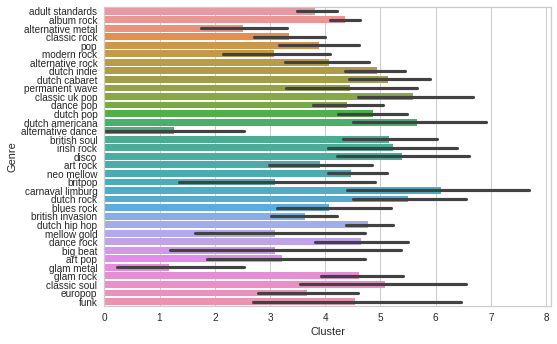

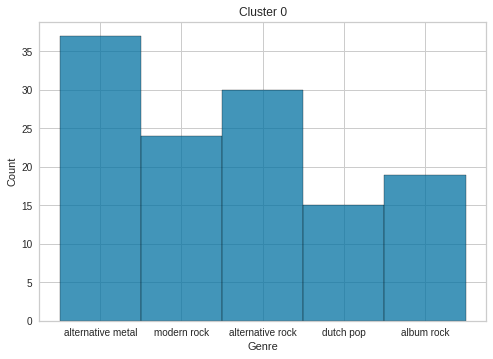

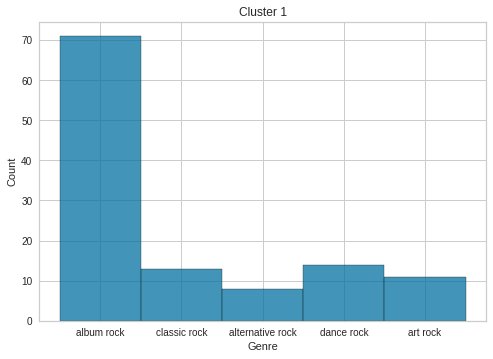

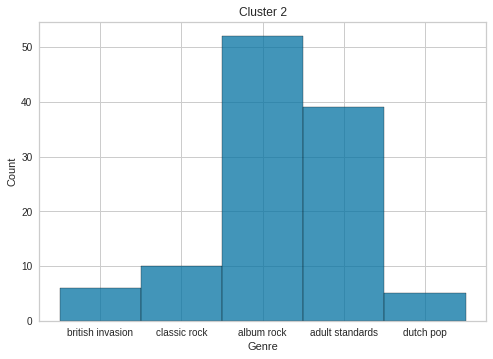

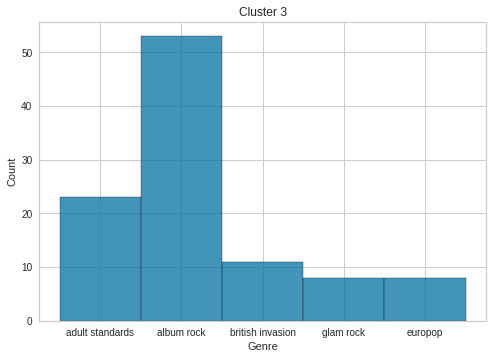

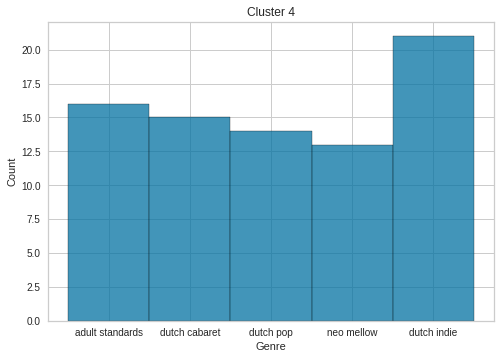

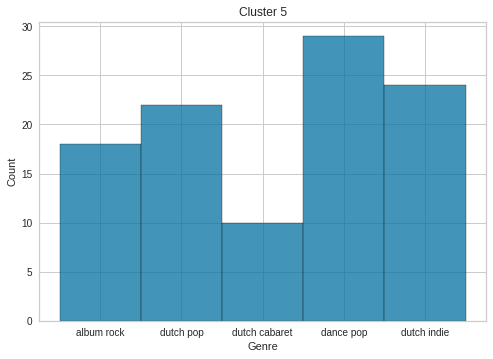

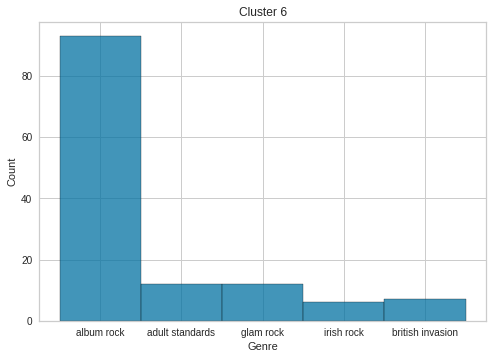

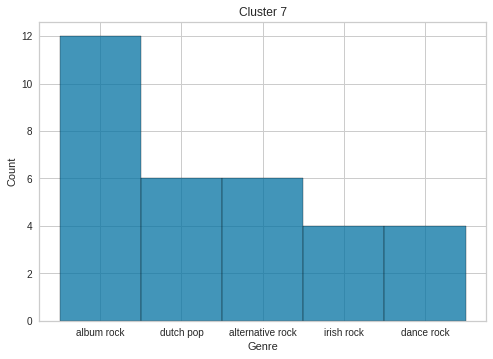

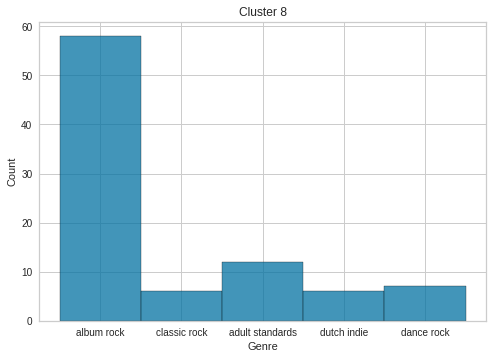

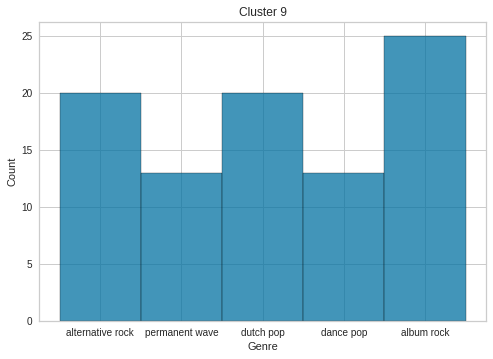

In [280]:
plt.figure()
sns.barplot(x=df_display['Cluster'], y=df_display['Genre'])
for i in range(0, 10):
  cluster_data = df_display[df_display['Cluster'] == i]
  top_genres = cluster_data['Genre'].value_counts()[0:5,].index.values
  top_data = cluster_data[cluster_data['Genre'].isin(top_genres)]
  plt.figure()
  sns.histplot(x=top_data['Genre'])
  plt.title('Cluster ' + str(i))

In [284]:
print(df_display.head(5))

   Year  Beats Per Minute (BPM)    Energy  Danceability  Loudness (dB)  \
0  2004                0.710059  0.278351      0.505882           0.52   
1  2000                0.579882  0.783505      0.470588           0.64   
3  2007                0.804734  0.958763      0.388235           0.92   
4  2002                0.408284  0.814433      0.564706           0.88   
6  2002                0.384615  0.701031      0.717647           0.84   

   Liveness   Valence  Length (Duration)  Acousticness  Speechiness  \
0  0.092784  0.677083           0.081880      0.959184     0.018868   
1  0.154639  0.812500           0.086429      0.173469     0.094340   
3  0.010309  0.354167           0.133434      0.000000     0.037736   
4  0.082474  0.875000           0.123578      0.010204     0.018868   
6  0.113402  0.531250           0.124337      0.061224     0.018868   

   Popularity  Cluster              Genre  
0    0.689655        4    adult standards  
1    0.321839        5         album roc

(1671, 2)


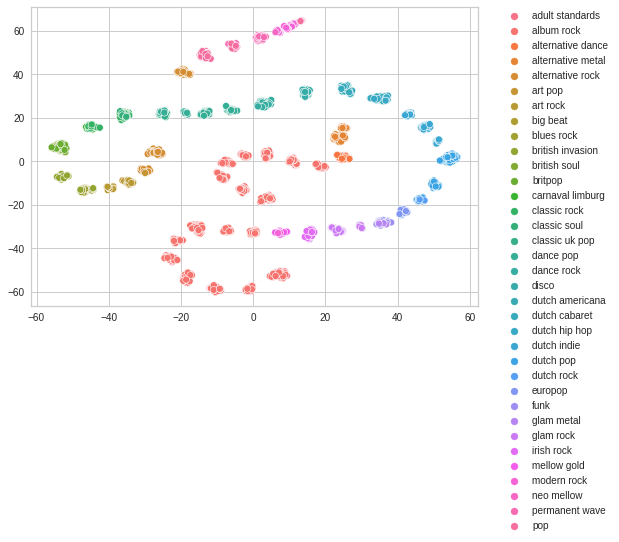

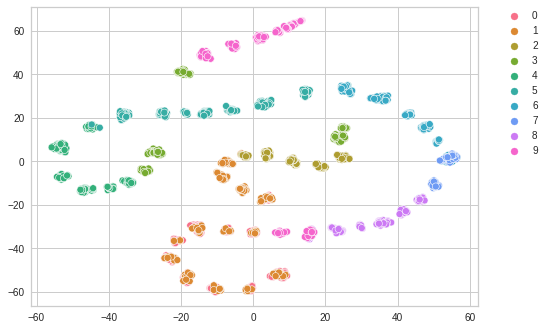

In [285]:
from sklearn.manifold import TSNE

# top_genres = df_display['Genre'].value_counts()[0:10,].index.values
# top_data = df_display[df_display['Genre'].isin(top_genres)]

x_embedded = TSNE(n_components=2).fit_transform(df_display.drop(['Genre', 'Cluster'], axis=1))
print(x_embedded.shape)
sns.scatterplot(x=x_embedded[:, 0], y=x_embedded[:,1], hue=df_display.sort_values('Genre')['Genre'], legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure()
sns.scatterplot(x=x_embedded[:, 0], y=x_embedded[:,1], hue=df_display.sort_values('Cluster')['Cluster'].astype(str), legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Hierarchical Clustering

In [282]:
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# model = AgglomerativeClustering().fit(df_encoded)
# plot_dendrogram(model)